In [ ]:
import pandas as pd
import numpy as np

In [2]:
rna_df = pd.read_csv("RNAseq.txt",sep='\t')

In [3]:
subtype_df = pd.read_csv("Subtypes.txt",sep='\t')

In [4]:
rna_df.head()

,Tumor ID,IGHA1,TMSB10,FTL,OLFM4,S100A6,IGHA2,EEF1A1P5,PIGR,RPL8,...,SERPINH1,CYSTM1,RALY,TMBIM1,NDRG1,MRPL14,EIF3D,CSDE1,EPS8L3,LY6G6D
0,TCGA-A6-2679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4944.518765,1924.602209,NaN,NaN,1902.300577,3237.068898,1217.298869
1,TCGA-AA-3837,NaN,NaN,NaN,NaN,NaN,NaN,373.377916,NaN,NaN,...,NaN,4542.494569,NaN,NaN,3304.344813,NaN,NaN,NaN,NaN,2796.119555
2,TCGA-CM-5861,872.473708,NaN,NaN,1212.363328,NaN,167.645463,2839.281822,NaN,NaN,...,3173.046713,NaN,1662.821916,NaN,3419.014582,4427.695070,NaN,NaN,2956.097826,0.000000
3,TCGA-AZ-4616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4625.177004,NaN,2138.800450,NaN,NaN,4776.834635,3429.130242,0.000000
4,TCGA-A6-5661,NaN,NaN,NaN,NaN,NaN,NaN,1364.978720,NaN,3283.080035,...,1173.705041,3445.475608,674.488864,3863.835470,1908.947221,148.185616,1263.805648,3598.070959,1946.876275,0.000000


In [5]:
subtype_df.head()

,Tumor ID,cms_label
0,TCGA-A6-2679,CMS1 (MSI Immune)
1,TCGA-AA-3837,CMS1 (MSI Immune)
2,TCGA-CM-5861,CMS1 (MSI Immune)
3,TCGA-AZ-4616,CMS1 (MSI Immune)
4,TCGA-A6-5661,CMS1 (MSI Immune)


In [6]:
rna_df.isna().sum()
# subtype_df.isna().sum()  (not a null or nan value)

Tumor ID      0
IGHA1       262
TMSB10      352
FTL         353
OLFM4       238
           ... 
MRPL14      118
EIF3D       154
CSDE1       172
EPS8L3       65
LY6G6D        8
Length: 969, dtype: int64

In [7]:
for i in range (969):
    if rna_df.isna().sum()[i]>645:
        print(rna_df.isna().sum()[i])
    else:
        pass

# if the number of missing data is more than 2/3 of the total number of data in that column, this column shouldn't be deleted. 
# Therefore, I checked if the missing value count > 2/3 of all data (645)

In [8]:
list(rna_df.columns.values)

['Tumor ID',
 'IGHA1',
 'TMSB10',
 'FTL',
 'OLFM4',
 'S100A6',
 'IGHA2',
 'EEF1A1P5',
 'PIGR',
 'RPL8',
 'TFF3',
 'RPS18',
 'ACTB',
 'CEACAM5',
 'ACTG1',
 'REG1A',
 'RPS21',
 'GAPDH',
 'RPS6',
 'LCN2',
 'RPS12',
 'TMSB4X',
 'LYZ',
 'RPS11',
 'CEACAM6',
 'IGHG1',
 'HLA-B',
 'SPINK4',
 'KRT8',
 'EEF2',
 'RPS28P7',
 'EEF1A1P6',
 'RPL13A',
 'MTCO1P12',
 'IGHG2',
 'EEF1A1',
 'IGF2',
 'TFF1',
 'PRDX5',
 'MTND2P28',
 'B2M',
 'RPLP1',
 'IGLC2',
 'TPT1',
 'KRT18',
 'RPS2',
 'DEFA5',
 'RPLP0',
 'AGR2',
 'RPL41P1',
 'RPS4X',
 'COL1A1',
 'HLA-DRA',
 'HLA-A',
 'CD74',
 'RPL19',
 'S100A11',
 'HLA-C',
 'IGHG4',
 'RPLP2',
 'SLC25A6',
 'FTH1',
 'RPL7A',
 'COL3A1',
 'RPS16',
 'RPL36AP37',
 'CLDN3',
 'GPX2',
 'RPS27',
 'REG4',
 'JCHAIN',
 'IFITM3',
 'REG3A',
 'PHGR1',
 'RPL35',
 'CKB',
 'LGALS4',
 'RPS27A',
 'SLC25A5',
 'PPDPF',
 'KRT19',
 'RPL23AP42',
 'PI3',
 'IGLC3',
 'IGKV3-20',
 'FABP1',
 'RPL3',
 'ATP5F1E',
 'IGKV4-1',
 'RNU4-2',
 'MTND1P23',
 'HSP90AB1',
 'RPL10',
 'RPL39P3',
 'RPL10A',
 'RPS8',
 

In [9]:
merged_df = rna_df.merge(subtype_df, on='Tumor ID')
merged_df.head()

,Tumor ID,IGHA1,TMSB10,FTL,OLFM4,S100A6,IGHA2,EEF1A1P5,PIGR,RPL8,...,CYSTM1,RALY,TMBIM1,NDRG1,MRPL14,EIF3D,CSDE1,EPS8L3,LY6G6D,cms_label
0,TCGA-A6-2679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4944.518765,1924.602209,NaN,NaN,1902.300577,3237.068898,1217.298869,CMS1 (MSI Immune)
1,TCGA-AA-3837,NaN,NaN,NaN,NaN,NaN,NaN,373.377916,NaN,NaN,...,4542.494569,NaN,NaN,3304.344813,NaN,NaN,NaN,NaN,2796.119555,CMS1 (MSI Immune)
2,TCGA-CM-5861,872.473708,NaN,NaN,1212.363328,NaN,167.645463,2839.281822,NaN,NaN,...,NaN,1662.821916,NaN,3419.014582,4427.695070,NaN,NaN,2956.097826,0.000000,CMS1 (MSI Immune)
3,TCGA-AZ-4616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4625.177004,NaN,2138.800450,NaN,NaN,4776.834635,3429.130242,0.000000,CMS1 (MSI Immune)
4,TCGA-A6-5661,NaN,NaN,NaN,NaN,NaN,NaN,1364.978720,NaN,3283.080035,...,3445.475608,674.488864,3863.835470,1908.947221,148.185616,1263.805648,3598.070959,1946.876275,0.000000,CMS1 (MSI Immune)


In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469 entries, 0 to 468
Columns: 970 entries, Tumor ID to cms_label
dtypes: float64(968), object(2)
memory usage: 3.5+ MB


In [11]:
def find_outliers(i):
    q1 = i.quantile(0.25)
    q3 = i.quantile(0.75)
    IQR = q3 - q1
    Q1 = q1 - (1.5*IQR)
    Q3 = q3 + (1.5*IQR)
    upper_outliers = i[i > Q3].index.tolist()
    lower_outliers = i[i < Q1].index.tolist()
    outliers = list(set(upper_outliers + lower_outliers))
    return(outliers)

import numpy as np
outlier_list = []
for i in merged_df.columns:
    if merged_df[i].dtype in ["int64","float64"]:
        outlier_list.append(find_outliers(merged_df[i]))

        
# print("Outliers for each column: ", outlier_list[0])
outlier_list = set(list(np.concatenate(outlier_list).flat))
print(len(outlier_list)) # 469, columns has outliers; so we can not fill the null or nan columns with the mean; I used mode for this

469


In [12]:
df = merged_df.fillna(merged_df.median(numeric_only=True))
df.head()

,Tumor ID,IGHA1,TMSB10,FTL,OLFM4,S100A6,IGHA2,EEF1A1P5,PIGR,RPL8,...,CYSTM1,RALY,TMBIM1,NDRG1,MRPL14,EIF3D,CSDE1,EPS8L3,LY6G6D,cms_label
0,TCGA-A6-2679,817.597193,2566.105356,2855.961848,542.650599,1333.586575,663.355764,1044.952591,411.354896,1123.637177,...,2663.868705,2591.456794,4944.518765,1924.602209,3225.351522,3198.558244,1902.300577,3237.068898,1217.298869,CMS1 (MSI Immune)
1,TCGA-AA-3837,817.597193,2566.105356,2855.961848,542.650599,1333.586575,663.355764,373.377916,411.354896,1123.637177,...,4542.494569,2591.456794,2531.345696,3304.344813,3225.351522,3198.558244,2962.062844,3150.912948,2796.119555,CMS1 (MSI Immune)
2,TCGA-CM-5861,872.473708,2566.105356,2855.961848,1212.363328,1333.586575,167.645463,2839.281822,411.354896,1123.637177,...,2663.868705,1662.821916,2531.345696,3419.014582,4427.695070,3198.558244,2962.062844,2956.097826,0.000000,CMS1 (MSI Immune)
3,TCGA-AZ-4616,817.597193,2566.105356,2855.961848,542.650599,1333.586575,663.355764,1044.952591,411.354896,1123.637177,...,2663.868705,4625.177004,2531.345696,2138.800450,3225.351522,3198.558244,4776.834635,3429.130242,0.000000,CMS1 (MSI Immune)
4,TCGA-A6-5661,817.597193,2566.105356,2855.961848,542.650599,1333.586575,663.355764,1364.978720,411.354896,3283.080035,...,3445.475608,674.488864,3863.835470,1908.947221,148.185616,1263.805648,3598.070959,1946.876275,0.000000,CMS1 (MSI Immune)


In [13]:
df['cms_label'].value_counts()

 CMS2 (Canonical)     175
CMS4 (Mesenchymal)    123
CMS1 (MSI Immune)     108
CMS3 (Metabolic)       63
Name: cms_label, dtype: int64

In [14]:
df = df.replace({' CMS2 (Canonical) ': "2"})
df = df.replace({'CMS4 (Mesenchymal)': "4"})
df = df.replace({'CMS1 (MSI Immune)': "1"})
df = df.replace({'CMS3 (Metabolic) ': "3"})

In [15]:
df['cms_label'].value_counts()

2    175
4    123
1    108
3     63
Name: cms_label, dtype: int64

In [16]:
X = df.iloc[:,1:-1].values #data
# X = (X - np.min(X)) / (np.max(X) - np.min(X)) # Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.
X.shape

(469, 968)

In [17]:
df.iloc[:,1:-1].describe()

,IGHA1,TMSB10,FTL,OLFM4,S100A6,IGHA2,EEF1A1P5,PIGR,RPL8,TFF3,...,SERPINH1,CYSTM1,RALY,TMBIM1,NDRG1,MRPL14,EIF3D,CSDE1,EPS8L3,LY6G6D
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,...,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,12706.874139,2584.817007,2869.436117,32686.047796,1391.343066,31751.575366,83039.592007,19734.740907,2246.743127,7132.885473,...,30647.303596,95533.521099,85781.880430,32222.405136,102591.324585,58389.803422,24091.363708,14301.880716,96901.858943,84572.219876
std,75603.911998,414.182080,421.747176,122300.155657,382.054786,120350.939574,185011.736646,96058.844646,23039.212618,56174.751465,...,117318.915506,195523.582449,187354.378894,119214.534051,201595.306905,157819.803942,101578.912643,76115.422876,196260.924558,187910.152417
min,0.000000,508.807709,585.500664,0.000000,148.268463,0.000000,0.000000,0.000000,92.383465,61.008467,...,50.241477,0.000000,0.000000,50.370064,0.000000,0.000000,51.439883,50.291820,0.000000,0.000000
25%,817.597193,2566.105356,2855.961848,542.650599,1333.586575,479.018164,405.736314,411.354896,1123.637177,644.756961,...,641.711298,1870.261369,1689.669163,1397.052993,1179.379047,2465.744695,2513.659809,1709.334973,2363.529694,0.000000
50%,817.597193,2566.105356,2855.961848,542.650599,1333.586575,663.355764,1044.952591,411.354896,1123.637177,644.756961,...,1725.730554,2663.868705,2591.456794,2531.345696,1924.602209,3225.351522,3198.558244,2962.062844,3150.912948,555.688324
75%,817.597193,2566.105356,2855.961848,542.650599,1333.586575,1009.543727,2683.706621,411.354896,1123.637177,644.756961,...,2671.183388,4066.251073,3721.364728,3373.938267,3872.345517,3863.662173,3691.463807,3475.932316,4289.235106,2130.502635
max,500001.000000,4932.276511,4963.851733,500016.000000,3649.575098,500026.000000,500031.000000,500036.000000,500041.000000,500046.000000,...,504791.000000,504796.000000,504801.000000,504806.000000,504811.000000,504816.000000,504821.000000,504826.000000,504831.000000,504836.000000


In [18]:
y = df.iloc[:, -1].values
y.shape

(469,)

In [19]:
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.feature_selection import SelectFromModel

In [20]:
# clf = ExtraTreesClassifier(n_estimators=50)
# clf = clf.fit(X, y)
# clf.feature_importances_  

# model = SelectFromModel(clf, prefit=True)
# X  = model.transform(X)
# X.shape

In [21]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
# X_new.shape

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree

In [24]:
maxDepth = 'max_depth'
table = pd.DataFrame(columns=[maxDepth, 'test_accuracy', 'train_accuracy'])

for i in range(2,11):
    model = DecisionTreeClassifier(criterion='gini', splitter='best', 
                   max_depth=i,max_features=None, random_state=21, 
                   max_leaf_nodes=None)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    train_accuracy = accuracy_score(y_train,y_pred_train)*100
    test_accuracy = accuracy_score(y_test,y_pred)*100

    table = table.append({maxDepth : i , 'test_accuracy' : test_accuracy, 'train_accuracy' : train_accuracy}, ignore_index=True)

print(table)



   max_depth  test_accuracy  train_accuracy
0        2.0      82.978723       82.926829
1        3.0      97.163121       96.341463
2        4.0      95.035461       98.170732
3        5.0      95.744681       99.390244
4        6.0      95.744681       99.695122
5        7.0      94.326241      100.000000
6        8.0      94.326241      100.000000
7        9.0      94.326241      100.000000
8       10.0      94.326241      100.000000


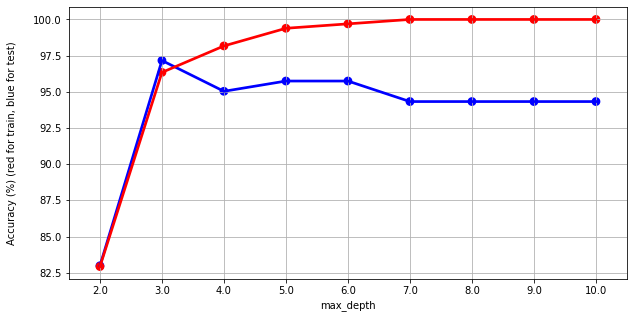

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
sns.pointplot(x=maxDepth, y="test_accuracy", data=table, color="b")
sns.pointplot(x=maxDepth, y="train_accuracy", data=table, color="r")
ax.set_ylabel('Accuracy (%) (red for train, blue for test)', labelpad=16)
plt.grid()

In [26]:
model_new = DecisionTreeClassifier(criterion='gini', splitter='best', 
                   max_depth=3,max_features=None, random_state=21, 
                   max_leaf_nodes=None)
    
model_new.fit(X_train, y_train)
y_pred = model_new.predict(X_test)
test_accuracy = accuracy_score(y_test,y_pred)*100

print('Test accuracy : %.2f'%test_accuracy)


Test accuracy : 97.16


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.94      0.95        32
           2       0.95      0.98      0.96        53
           3       1.00      1.00      1.00        19
           4       1.00      0.97      0.99        37

    accuracy                           0.97       141
   macro avg       0.98      0.97      0.98       141
weighted avg       0.97      0.97      0.97       141



In [28]:
# The max_depth value with the highest test accuracy value is observed as "3". Therefore, the max_depth value should be 3.

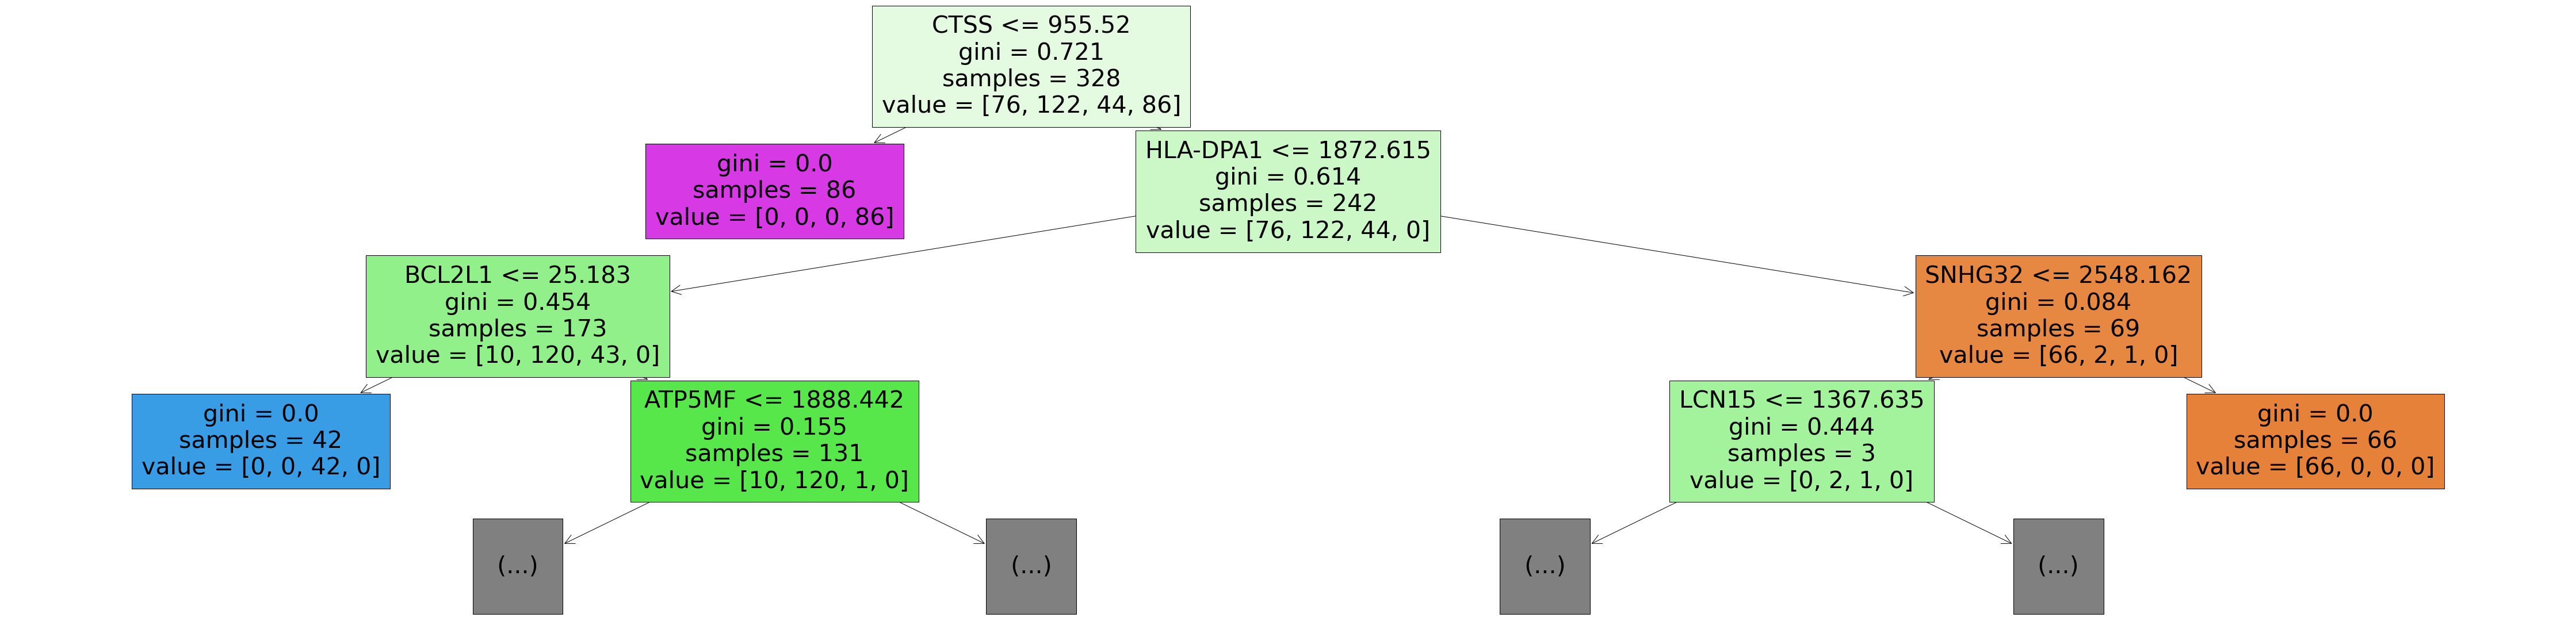

In [29]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))

plot_tree(model, feature_names=df.columns, max_depth=3, filled=True);